In [ ]:
#Logistic Regression

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
df = pd.read_csv(r'C:\Users\Muhammad_Talha\Downloads\COHORT 7\Week 1 + 2 + 3\Machine Learning\loan.csv')
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [45]:
df.shape

(61, 8)

In [46]:
df.info

<bound method DataFrame.info of     age  gender    occupation education_level marital_status  income  \
0    32    Male      Engineer      Bachelor's        Married   85000   
1    45  Female       Teacher        Master's         Single   62000   
2    28    Male       Student     High School         Single   25000   
3    51  Female       Manager      Bachelor's        Married  105000   
4    36    Male    Accountant      Bachelor's        Married   75000   
..  ...     ...           ...             ...            ...     ...   
56   39    Male     Architect        Master's        Married  100000   
57   25  Female  Receptionist     High School         Single   32000   
58   43    Male        Banker      Bachelor's        Married   95000   
59   30  Female        Writer        Master's         Single   55000   
60   38    Male          Chef     Associate's        Married   65000   

    credit_score loan_status  
0            720    Approved  
1            680    Approved  
2         

In [47]:
cate_col = []
for col in df.columns:
    if df[col].dtype == object:
        cate_col.append(col)

In [48]:
cate_col

['gender', 'occupation', 'education_level', 'marital_status', 'loan_status']

In [49]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in cate_col:
    df[col] = LE.fit_transform(df[col])

In [50]:
df

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,0
1,45,0,35,4,1,62000,680,0
2,28,1,33,3,1,25000,590,1
3,51,0,16,1,0,105000,780,0
4,36,1,0,1,0,75000,710,0
...,...,...,...,...,...,...,...,...
56,39,1,2,4,0,100000,770,0
57,25,0,27,3,1,32000,570,1
58,43,1,4,1,0,95000,760,0
59,30,0,37,4,1,55000,650,0


In [51]:
df.info

<bound method DataFrame.info of     age  gender  occupation  education_level  marital_status  income  \
0    32       1          12                1               0   85000   
1    45       0          35                4               1   62000   
2    28       1          33                3               1   25000   
3    51       0          16                1               0  105000   
4    36       1           0                1               0   75000   
..  ...     ...         ...              ...             ...     ...   
56   39       1           2                4               0  100000   
57   25       0          27                3               1   32000   
58   43       1           4                1               0   95000   
59   30       0          37                4               1   55000   
60   38       1           5                0               0   65000   

    credit_score  loan_status  
0            720            0  
1            680            0  
2      

In [52]:
from sklearn.model_selection import train_test_split
y = df['loan_status']
x = df.drop('loan_status',axis=1)


In [53]:
y.shape

(61,)

In [54]:
train_x, test_x, train_y, test_y = train_test_split(x,y ,test_size=0.2, random_state= 42)

In [55]:
print(train_x.shape,train_y.shape)

(48, 7) (48,)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [57]:
print(train_x.shape)
print( train_y.shape)
print(test_x.shape)
print( test_y.shape)

(48, 7)
(48,)
(13, 7)
(13,)


In [58]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [59]:
LR

LogisticRegression()

In [60]:
LR.fit(train_x, train_y)

LogisticRegression()

In [61]:
y_pred = LR.predict(test_x)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [62]:
from sklearn.metrics import confusion_matrix,r2_score,accuracy_score
confusion_matrix(test_y,y_pred)

array([[9, 0],
       [0, 4]], dtype=int64)

In [63]:
accuracy = accuracy_score(test_y, y_pred)
accuracy

1.0

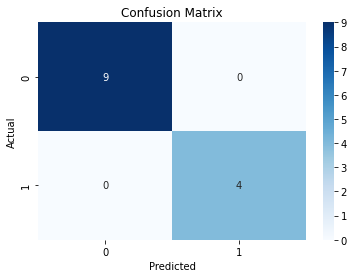

In [64]:
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [65]:
#Decision Tree


In [66]:
dff = pd.read_csv(r'C:\Users\Muhammad_Talha\Downloads\COHORT 7\Week 1 + 2 + 3\Machine Learning\car_evaluation.csv')

In [67]:
dff

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [68]:
dff.columns = ['Buying', 'Price','Doors','Capacity', 'Size','Safety','Class']
dff

,Buying,Price,Doors,Capacity,Size,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [69]:
dff.shape

(1727, 7)

In [70]:
dff.info

<bound method DataFrame.info of      Buying  Price  Doors Capacity   Size Safety  Class
0     vhigh  vhigh      2        2  small    med  unacc
1     vhigh  vhigh      2        2  small   high  unacc
2     vhigh  vhigh      2        2    med    low  unacc
3     vhigh  vhigh      2        2    med    med  unacc
4     vhigh  vhigh      2        2    med   high  unacc
...     ...    ...    ...      ...    ...    ...    ...
1722    low    low  5more     more    med    med   good
1723    low    low  5more     more    med   high  vgood
1724    low    low  5more     more    big    low  unacc
1725    low    low  5more     more    big    med   good
1726    low    low  5more     more    big   high  vgood

[1727 rows x 7 columns]>

In [71]:
categ_col = []
for col in dff.columns:
    if dff[col].dtype == object:
        categ_col.append(col)

In [72]:
categ_col

['Buying', 'Price', 'Doors', 'Capacity', 'Size', 'Safety', 'Class']

In [73]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in categ_col:
    dff[col] = LE.fit_transform(dff[col])

In [74]:
dff

,Buying,Price,Doors,Capacity,Size,Safety,Class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [75]:
from sklearn.model_selection import train_test_split
y = dff['Class']
x = dff.drop('Class',axis=1)


In [76]:
train_x, test_x, train_y, test_y = train_test_split(x,y ,test_size=0.2, random_state= 42)

In [77]:
print(train_x.shape)
print( train_y.shape)
print(test_x.shape)
print( test_y.shape)

(1381, 6)
(1381,)
(346, 6)
(346,)


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [79]:
print(train_x.shape)
print( train_y.shape)
print(test_x.shape)
print( test_y.shape)

(1381, 6)
(1381,)
(346, 6)
(346,)


In [86]:
from sklearn.tree import DecisionTreeClassifier
ctc = DecisionTreeClassifier(random_state=42)


In [89]:
ctc

DecisionTreeClassifier(random_state=42)

In [90]:
ctc.fit(train_x, train_y)

DecisionTreeClassifier(random_state=42)

In [92]:
y_pred = ctc.predict(test_x)

In [94]:
accuracy = r2_score(test_y, y_pred)
accuracy

0.860920707455361

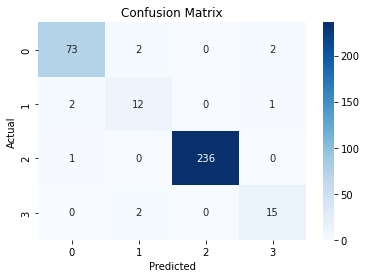

In [95]:
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()